In [ ]:
from loader import load_signal
from filtering import apply_filter
from visualization import plot_signal

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


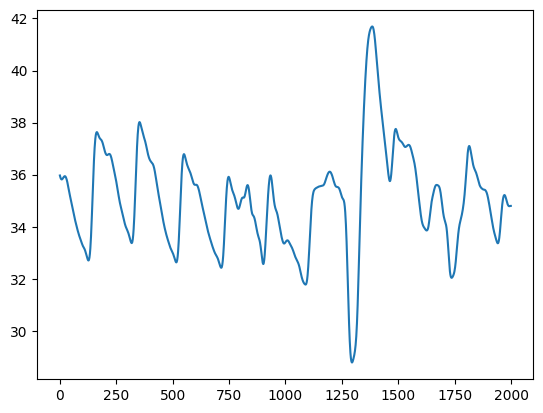

In [10]:
# Load the CSV file (ignoring the column names)
data = pd.read_csv('./sample_data/stress_high.csv', header=0)

# Read only the second column (index 1, since Python is zero-indexed) and the first 2000 records
second_column = data.iloc[:2000, 1]  # First 2000 rows, second column

plt.plot(second_column)
plt.show()